In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
wells = pd.read_csv('TeapotDomeWellHeaders_outliers_JRP.csv')

In [4]:
wells.head()

,API Number,Operator,Well Name,Well Number,Northing,Easting,Well Status,Class,Total Depth,Datum Elevation,...,Field,Basin,Lease Name,Ground Elevation,Plugback Depth,Spud Date,Completion Date,Common Well Name,Legal Survey Type,Location
0,490251039700,U.S. DOE,NPR-3,34-A-21,974652.3,794810.9,PA,I,2914.0,4921.0,...,Teapot Dome,Powder River,Naval Petroleum Reserve No. 3,4911.0,NaN,7/8/1977,NaN,34-A-21,CONGRESS,TWP: 39 N - Range: 78 W - Sec. 21
1,490250631800,U.S. DOE,NPR-3,82-S-14,950092.0,808959.2,PR,O,1286.0,5293.0,...,Teapot Dome,Powder River,Naval Petroleum Reserve No. 3,5288.0,NaN,7/4/1962,7/6/1962,82-S-14,CONGRESS,TWP: 38 N - Range: 78 W - Sec. 14
2,490250632200,U.S. DOE,NPR-3,71-SX-14,950778.6,808258.9,PR,O,3052.0,5247.0,...,Teapot Dome,Powder River,Naval Petroleum Reserve No. 3,5259.0,3052.0,8/19/1959,NaN,71-SX-14,CONGRESS,TWP: 38 N - Range: 78 W - Sec. 14
3,490250632500,U.S. DOE,NPR-3,48-S-11,951369.6,806496.9,PR,O,762.0,5192.0,...,Teapot Dome,Powder River,Naval Petroleum Reserve No. 3,5187.0,NaN,7/12/1963,NaN,48-S-11,CONGRESS,TWP: 38 N - Range: 78 W - Sec. 11
4,490250632600,U.S. DOE,NPR-3,88-St-11,951458.9,809057.2,PR,O,2988.0,5289.0,...,Teapot Dome,Powder River,Naval Petroleum Reserve No. 3,5279.0,NaN,10/28/1958,NaN,88-ST-11,CONGRESS,TWP: 38 N - Range: 78 W - Sec. 11


In [72]:
gdf = gpd.GeoDataFrame(wells, geometry=gpd.points_from_xy(wells.Easting, wells.Northing), crs='EPSG:32056')

In [73]:
gdf.crs

'EPSG:32056'

In [74]:
reproj = gdf.to_crs("EPSG:4324")

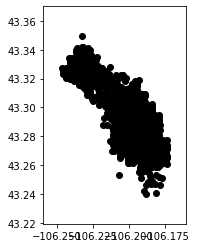

In [75]:
reproj.plot(color='black')

In [9]:
cities = gpd.read_file(r'F:\Geology\WSGS\GIS\Administrative\cities.shp')
cities = cities.to_crs("EPSG:4324")
cities = cities[cities.Population>15000]
state = gpd.read_file(r'F:\Geology\WSGS\GIS\States.shp')
state = state.to_crs("EPSG:4324")
highway = gpd.read_file(r'F:\Geology\WSGS\GIS\Highway_road.shp')
highway = highway.to_crs("EPSG:4324")
counties = gpd.read_file(r'F:\Geology\WSGS\GIS\County_boundaries_polys.shp')
counties = counties.to_crs("EPSG:4324")
basins = gpd.read_file(r'F:\Geology\WSGS\GIS\Basins.shp')
basins = basins.to_crs("EPSG:4324")
basins.iloc[1,1] = 'GREATER GREEN RIVER BASIN'
basins.iloc[5,1] = 'DENVER BASIN'
basins = basins[basins.BASIN_NAME.isin(['POWDER RIVER BASIN', 'LARAMIE BASIN', 'HANNA BASIN', 'SHIRLEY BASIN', 'WIND RIVER BASIN',
                              'BIGHORN BASIN', 'GREATER GREEN RIVER BASIN', 'DENVER BASIN'])]

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax 

In [10]:
state = state[state.STATE_NAME.isin(['Wyoming', 'Colorado', 'Montana', 'Idaho', 'Nebraska', 'South Dakota', 'Utah'])]

In [11]:
highway = highway[highway['TYPE'] == 'Interstate']

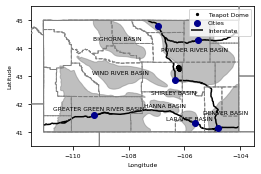

In [12]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
reproj.plot(color='k', ax=ax, label='Teapot Dome', markersize=5, zorder=2)
cities.plot(color='darkblue', ax=ax, label='Cities', zorder=4)
state.plot(edgecolor='gray',color='None', ax=ax, zorder=3)
highway.plot(color='black', ax=ax, label='Interstate', zorder=3)
counties.plot(color='None', edgecolor='gray', ax=ax, linestyle='--', zorder=3)
basins.plot(color='gray', edgecolor='gray', ax=ax, linestyle='-', alpha=0.5, zorder=1)
#ax = basins.plot()
basins.apply(lambda x: ax.annotate(s=x.BASIN_NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=6),axis=1)
plt.xlim( -111.5, -103.5)
plt.ylim(40.5, 45.5)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('Longitude', fontsize=6)
plt.ylabel('Latitude', fontsize=6)
plt.legend(fontsize=6)
plt.savefig('basemap.pdf')

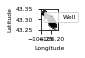

In [80]:
fig, ax = plt.subplots(1,1, figsize=(1,2))
reproj.plot(color='k', ax=ax, markersize=0.5, label='Well', edgecolor='None')

plt.xlabel('Longitude', fontsize=6)
plt.ylabel('Latitude', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim( -106.25, -106.17)
plt.ylim(43.25, 43.35) 
plt.legend(fontsize=6)
plt.savefig('base_close.pdf')
plt.tight_layout()

In [88]:
import matplotlib.colors as colors
by_wellDF = pd.read_csv('error_map.csv', index_col=[0])
gdf = gpd.GeoDataFrame(by_wellDF, geometry=gpd.points_from_xy(by_wellDF.Easting, by_wellDF.Northing), crs='EPSG:32056')
errors = gdf.to_crs("EPSG:4324")

In [89]:
errors

,API,Well_MAE,well_rmse,Easting,Northing,geometry
0,490251060900,6.045543,7.261973,803439.4,950558.1,POINT (-106.19485 43.26961)
1,490250647200,7.196078,7.370438,804925.0,960424.4,POINT (-106.18877 43.29662)
2,490251120300,39.626190,55.890474,798582.9,961391.1,POINT (-106.21254 43.29951)
3,490251035700,0.359530,0.359530,801001.5,961614.4,POINT (-106.20344 43.30004)
4,490251108600,29.718403,29.774521,806000.9,954932.0,POINT (-106.18501 43.28152)
...,...,...,...,...,...,...
622,490251067800,33.200942,33.200942,792979.6,972577.0,POINT (-106.23303 43.33040)
623,490251057800,2.837390,2.837390,804534.0,957973.1,POINT (-106.19036 43.28991)
624,490252257800,0.968139,0.968139,803373.8,955205.2,POINT (-106.19486 43.28237)
625,490251074400,2.240801,2.240801,800306.2,962235.6,POINT (-106.20602 43.30177)


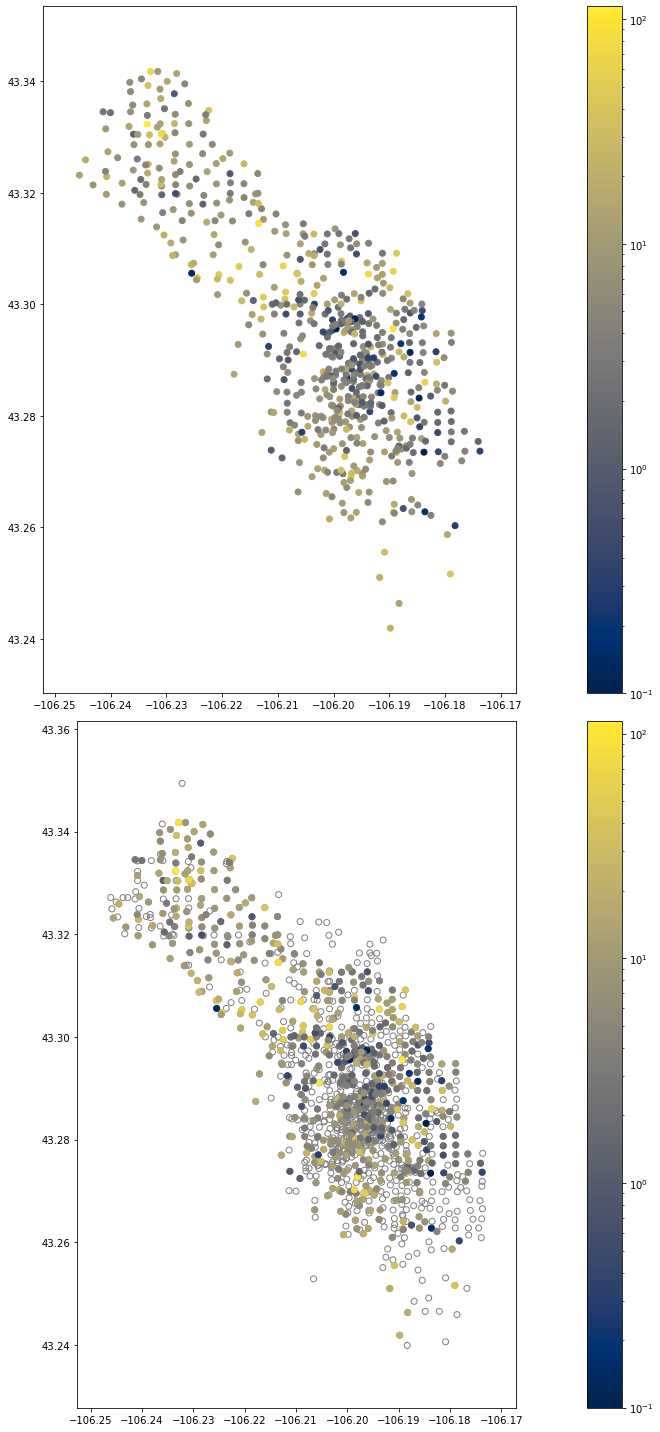

In [117]:
fig, [ax0, ax1] = plt.subplots(2,1, figsize=(20,20))
errors.plot(column='Well_MAE', ax=ax0, norm=colors.LogNorm(vmin=0.1, vmax=errors.Well_MAE.max()),
           legend=True, cmap='cividis')
reproj.plot(ax=ax1, color='None', edgecolor='gray')
errors.plot(column='well_rmse',ax=ax1, norm=colors.LogNorm(vmin=0.1, vmax=errors.Well_MAE.max()),
           legend=True, cmap='cividis')

plt.tight_layout()

In [121]:
errors.shape[0]/reproj.shape[0]

0.4760820045558087